Reference for Theory : https://machinelearningmastery.com/linear-regression-for-machine-learning/

Importing required libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import linear_model

Importing CSV file

In [5]:
data = pd.read_csv("mtcars.csv")

In [6]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
data.shape

(32, 12)

In [9]:
type(data)

pandas.core.frame.DataFrame

Plotting the data

Text(0,0.5,'Miles per gallon')

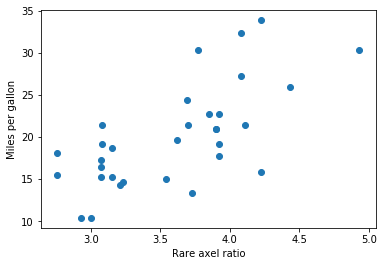

In [13]:
plt.scatter(data['drat'],data['mpg'])
plt.xlabel('Rare axel ratio', fontsize=10)
plt.ylabel('Miles per gallon', fontsize=10)

In [14]:
x = data[['drat']]
y = data[['mpg']]

In [15]:
x.head()

,drat
0,3.90
1,3.90
2,3.85
3,3.08
4,3.15


In [16]:
y.head()

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7


Implementing Linear Regression model

In [17]:
lm = linear_model.LinearRegression()

In [19]:
fit_m1 = lm.fit(X=x,y=y)

In [20]:
fit_m1.intercept_ #intercept

array([-7.52461844])

In [21]:
fit_m1.coef_ #slope

array([[7.6782326]])

Function to draw line 

In [29]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals,'--')

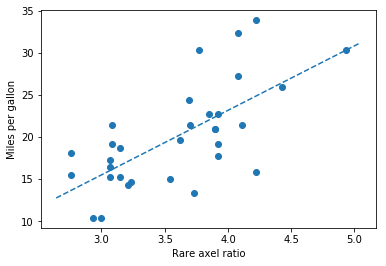

In [57]:
plt.scatter(data['drat'],data['mpg'])
plt.xlabel('Rare axel ratio', fontsize=10)
plt.ylabel('Miles per gallon', fontsize=10)
abline(slope = 7.6782326,intercept = -7.52461844)

Having two data for more accurate prediction

In [32]:
x = data[['drat','hp']]
y = data[['mpg']]

In [33]:
x.head()

,drat,hp
0,3.90,110
1,3.90,110
2,3.85,93
3,3.08,110
4,3.15,175


In [34]:
y.head()

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7


In [35]:
fit_m2 = lm.fit(X=x,y=y)

In [37]:
intercept = fit_m2.intercept_

Prediction for our own model car

drat = 3.90, 
hp = 120

In [39]:
x_new = np.array([3.90, 120])
beta = fit_m2.coef_

In [41]:
beta.shape

(1, 2)

In [42]:
beta = np.transpose(beta)
beta.shape

(2, 1)

In [43]:
pred = intercept + np.dot(x_new,beta)

In [44]:
print(pred)

[22.89827847]


Calculating residual standard error

In [45]:
y_hat = intercept + np.dot(x,beta)

In [46]:
error_sqr = np.square(y - y_hat)

In [47]:
print(error_sqr)

          mpg
0    5.837757
1    5.837757
2    1.591660
3    3.372161
4    4.724561
5    0.048039
6    1.247201
7    0.265525
8    2.210895
9   13.226908
10  25.370177
11   0.258462
12   1.983567
13   0.478322
14  12.525938
15  11.223872
16   0.417340
17  34.334608
18   0.737663
19  44.223102
20   2.721642
21   0.238905
22   6.869959
23   5.411487
24   9.014866
25   0.576953
26   0.792305
27  60.062120
28   1.309677
29   0.932135
30  24.277183
31   9.330244


Calculating Total sum of squares of Error

In [48]:
TSS = np.sum(error_sqr)

In [49]:
print(TSS)

mpg    291.45299
dtype: float64


In [50]:
n = x.shape[0]
p = x.shape[1]

Calculating mean sum of squares

In [51]:
MSS = TSS/(n-p-1)

In [52]:
print(MSS)

mpg    10.050103
dtype: float64


Calculating residual standard error

In [53]:
Residual_standard_error = np.sqrt(MSS)

In [54]:
lower_bound = pred - [[2*Residual_standard_error]]
upper_bound = pred + [[2*Residual_standard_error]]

In [55]:
print(lower_bound, upper_bound)

[[[16.55789896]]] [[[29.23865799]]]


Conclusion : Therefore the mpg lies inbetween 16 to 29 scale of miles per gallon for the drat of 3.9